# The first part of this notebook is simply preparing the input for R and DESeq2 where we will be comparing the various NOD groups

In [45]:
import pandas as pd
import numpy as np
import gseapy as gp
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
counts_df = pd.read_csv('/Users/matthewbernstein/Development/anna_karenina_beta_cell/data_for_DESeq2/Raw_Matrix_filter_rmDup.csv', index_col=0)
counts_df

,T729_T2D,T737_T2H,Q203_E18.5,Q204_P1,T222_T1D,Q225_T1ND,Q279_T2D_XXX,T286.1_T2H,Q287_WT,Q292_WT,...,Q792_WT,Q819_WT,T843_WT,T880_WT,Q890_WT,Q891_T1ND,Q896_T1ND,Q897_T1ND,Q899_T1ND,Q918_T2H
GENE_ID,,,,,,,,,,,,,,,,,,,,,
0610007P14RIK,1233.00,1212.00,1039.97,1179.96,586.07,465.44,404.90,497.26,590.16,490.99,...,369.03,655.94,752.62,632.23,532.46,717.28,543.89,579.59,378.01,439.85
0610009B22RIK,6048.40,3608.59,3554.90,3224.48,1475.05,1309.53,1348.77,1427.68,1299.68,1846.15,...,1525.98,1570.52,1973.26,1772.51,1641.50,1856.05,1863.37,1309.23,1120.49,1493.43
0610009D07RIK,2608.15,3372.00,6266.52,6086.78,1928.94,1871.15,1517.46,2254.95,2485.87,2210.91,...,2500.21,2293.26,2848.21,2637.55,2210.99,2329.88,1450.88,1841.17,1764.46,2228.42
0610009O20RIK,292.00,480.98,335.45,424.02,200.61,143.00,264.09,209.32,304.65,165.48,...,253.14,284.00,229.58,233.00,209.03,437.00,105.03,225.07,168.41,202.00
0610010F05RIK,1365.00,1127.70,808.69,1056.00,744.33,597.00,1344.31,677.08,1256.51,577.00,...,655.97,628.09,1052.94,1439.23,715.39,722.00,461.00,1456.85,520.59,532.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,163.03,281.00,523.00,1686.00,609.00,124.99,229.72,5.07,98.00,50.00,...,91.00,139.00,72.00,112.00,107.00,186.00,268.97,476.01,271.03,143.00
ZZEF1,871.00,1386.00,1087.45,899.73,1070.20,739.58,794.05,526.45,814.36,966.48,...,1032.92,999.06,1093.02,762.83,873.41,1125.93,473.00,667.70,767.61,783.58
ZZZ3,1231.03,1294.00,759.35,1311.79,660.59,623.00,2413.77,753.55,1764.66,902.24,...,1013.43,1134.73,1656.51,1441.79,1052.67,960.32,476.00,1417.36,684.39,484.00


In [3]:
meta_df = pd.read_csv('/Users/matthewbernstein/Development/anna_karenina_beta_cell/data_for_DESeq2/AKP_Metadata_v2.csv', index_col=0)
meta_df

,COND,GROUP,EXRCT_MET,BATCH
GENE_ID,,,,
T729_T2D,T2D,T2D,T,3
T737_T2H,T2H,HEALTHY_ADULT,T,3
Q203_E18.5,E18.5,DEVELOPMENT,Q,1
Q204_P1,P1,DEVELOPMENT,Q,1
T222_T1D,T1D,T1D,T,2
...,...,...,...,...
Q891_T1ND,T1ND,HEALTHY_ADULT,Q,1
Q896_T1ND,T1ND,T1D,Q,1
Q897_T1ND,T1ND,T1D,Q,2


### Gather the sample ID's that are in each NOD group

In [4]:
NOD_ND_ClustHealthyAdult = set([
    'Q899_T1ND',
    'Q891_T1ND',
    'Q225_T1ND'
])
NOD_ND_ClustDiabetic = set([
    'Q759_T1ND',
    'Q896_T1ND',
    'Q897_T1ND',
    'Q768_T1ND'
])
NOD_T1D_ClustDiabetic = set([
    'Q762_T1D',
    'Q393_T1D',
    'Q765_T1D',
    'T222_T1D'
])
assert NOD_ND_ClustHealthyAdult < set(meta_df.index)
assert NOD_ND_ClustDiabetic < set(meta_df.index)
assert NOD_T1D_ClustDiabetic < set(meta_df.index)

assert NOD_ND_ClustHealthyAdult < set(counts_df.columns)
assert NOD_ND_ClustDiabetic < set(counts_df.columns)
assert NOD_T1D_ClustDiabetic < set(counts_df.columns)

### Slice the counts matrix to keep only NOD samples

In [5]:
keep_samples = sorted(NOD_ND_ClustHealthyAdult | NOD_ND_ClustDiabetic | NOD_T1D_ClustDiabetic)
keep_counts_df = counts_df[keep_samples]
keep_counts_df

,Q225_T1ND,Q393_T1D,Q759_T1ND,Q762_T1D,Q765_T1D,Q768_T1ND,Q891_T1ND,Q896_T1ND,Q897_T1ND,Q899_T1ND,T222_T1D
GENE_ID,,,,,,,,,,,
0610007P14RIK,465.44,634.46,665.78,356.66,474.48,569.49,717.28,543.89,579.59,378.01,586.07
0610009B22RIK,1309.53,2272.40,1714.73,973.01,1529.75,1460.74,1856.05,1863.37,1309.23,1120.49,1475.05
0610009D07RIK,1871.15,2130.83,2436.62,1264.99,1947.26,1895.97,2329.88,1450.88,1841.17,1764.46,1928.94
0610009O20RIK,143.00,95.00,275.73,128.00,57.00,74.99,437.00,105.03,225.07,168.41,200.61
0610010F05RIK,597.00,637.98,533.00,433.00,421.04,728.05,722.00,461.00,1456.85,520.59,744.33
...,...,...,...,...,...,...,...,...,...,...,...
ZYX,124.99,427.01,435.00,404.00,190.00,327.00,186.00,268.97,476.01,271.03,609.00
ZZEF1,739.58,877.81,846.00,551.00,588.00,676.11,1125.93,473.00,667.70,767.61,1070.20
ZZZ3,623.00,661.59,891.20,333.97,499.18,644.98,960.32,476.00,1417.36,684.39,660.59


### Slice the metadata table to keep only the NOD samples

In [6]:
keep_meta_df = meta_df.loc[keep_samples]
keep_meta_df

,COND,GROUP,EXRCT_MET,BATCH
GENE_ID,,,,
Q225_T1ND,T1ND,HEALTHY_ADULT,Q,2
Q393_T1D,T1D,T1D,Q,1
Q759_T1ND,T1ND,T1D,Q,1
Q762_T1D,T1D,T1D,Q,1
Q765_T1D,T1D,T1D,Q,1
Q768_T1ND,T1ND,T1D,Q,1
Q891_T1ND,T1ND,HEALTHY_ADULT,Q,1
Q896_T1ND,T1ND,T1D,Q,1
Q897_T1ND,T1ND,T1D,Q,2


### Add NOD group info to the metadata table

In [7]:
nod_group = []
for sample in keep_meta_df.index:
    if sample in NOD_ND_ClustHealthyAdult:
        nod_group.append('NOD_ND_HealthyAdult')
    elif sample in NOD_ND_ClustDiabetic:
        nod_group.append('NOD_ND_Diabetic')
    elif sample in NOD_T1D_ClustDiabetic:
        nod_group.append('NOD_T1D_Diabetic')
keep_meta_df['NOD_GROUP'] = nod_group
keep_meta_df

,COND,GROUP,EXRCT_MET,BATCH,NOD_GROUP
GENE_ID,,,,,
Q225_T1ND,T1ND,HEALTHY_ADULT,Q,2,NOD_ND_HealthyAdult
Q393_T1D,T1D,T1D,Q,1,NOD_T1D_Diabetic
Q759_T1ND,T1ND,T1D,Q,1,NOD_ND_Diabetic
Q762_T1D,T1D,T1D,Q,1,NOD_T1D_Diabetic
Q765_T1D,T1D,T1D,Q,1,NOD_T1D_Diabetic
Q768_T1ND,T1ND,T1D,Q,1,NOD_ND_Diabetic
Q891_T1ND,T1ND,HEALTHY_ADULT,Q,1,NOD_ND_HealthyAdult
Q896_T1ND,T1ND,T1D,Q,1,NOD_ND_Diabetic
Q897_T1ND,T1ND,T1D,Q,2,NOD_ND_Diabetic


### Write the output to files that will then be fed into DESeq2

In [8]:
keep_counts_df.to_csv('/Users/matthewbernstein/Development/anna_karenina_beta_cell/data_for_DESeq2/Raw_Matrix_filter_rmDup.NOD_comparison.csv')
keep_meta_df.to_csv('/Users/matthewbernstein/Development/anna_karenina_beta_cell/data_for_DESeq2/AKP_Metadata_v2.NOD_comparison.csv')

# We now assume that we've run DESeq2 analysis on the data and now we analyze the DE results

### Make sure we display all rows

In [17]:
pd.set_option('display.max_rows', 2000)

# ND cluster w/ Diabetic (NDCD) vs. T1D cluster w/ Diabetic (T1DCD)

## Genes that are HIGH in NDCD and LOW in T1DCD

In [18]:
df_NDCD_vs_T1DCD = pd.read_csv('/Users/matthewbernstein/Development/anna_karenina_beta_cell/results/NOD_ND_Diabetic_vs_NOD_T1D_Diabetic.csv', index_col=0)
df_NDCD_vs_T1DCD = df_NDCD_vs_T1DCD.loc[df_NDCD_vs_T1DCD['padj'] < 0.05]
genes_high_NDCD_low_T1DCD = df_NDCD_vs_T1DCD.loc[df_NDCD_vs_T1DCD['log2FoldChange'] > 0]
genes_high_NDCD_low_T1DCD

,baseMean,log2FoldChange,lfcSE,pvalue,padj
ADORA1,499.600078,0.872371,0.488812,3.653907e-05,0.026383
CYP4F39,108.429727,0.945176,0.864804,7.298944e-05,0.045174
EMID1,96.159110,1.507565,1.010257,1.292568e-05,0.014000
FAM163A,176.131694,1.534953,0.423236,1.062156e-06,0.002755
FRZB,2337.987455,1.571981,0.419473,7.959098e-07,0.002586
JPH3,266.042897,1.358713,0.370496,1.271742e-06,0.002755
KCNF1,161.073456,2.512062,0.544261,8.792504e-09,0.000114
LINGO3,49.595696,1.329842,1.112703,1.897660e-05,0.016612
MARCH4,425.764181,0.772601,0.365580,1.689687e-05,0.016612
RPH3A,55.599304,1.556042,1.097339,1.063282e-05,0.012563


### Enriched gene sets

No significantly enriched gene sets were found...

In [19]:
enr = gp.enrichr(
     gene_list=list(genes_high_NDCD_low_T1DCD.index),
     gene_sets=['GO_Biological_Process_2018', 'GO_Molecular_Function_2018'],
     cutoff=0.05,
     organism='Mouse' 
)
gsea_df = enr.results[enr.results["Adjusted P-value"] < 0.05][['Term', 'Adjusted P-value']]
gsea_df

2021-04-25 17:07:48,777 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2021-04-25 17:07:51,037 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


,Term,Adjusted P-value


## Genes that are LOW in NDCD and HIGH in T1DCD

In [20]:
genes_low_NDCD_high_T1DCD = df_NDCD_vs_T1DCD.loc[df_NDCD_vs_T1DCD['log2FoldChange'] < 0]
genes_low_NDCD_high_T1DCD

,baseMean,log2FoldChange,lfcSE,pvalue,padj
1810011O10RIK,317.628601,-1.151594,0.371228,3.774642e-06,0.005451
CENPA,100.673004,-1.142162,0.571429,2.037051e-05,0.016612
COL27A1,159.841881,-2.358825,0.704739,3.012569e-07,0.001958
DAPL1,1625.285943,-1.734724,0.597713,2.237791e-06,0.003739
MGLL,190.319521,-1.288306,0.505167,7.846560e-06,0.010198
S100G,182.679820,-1.736909,0.452085,4.766291e-07,0.002065
SAT1,2400.167734,-0.702892,0.449381,5.864686e-05,0.038112
UBE2C,206.818991,-1.180826,0.640909,2.345148e-05,0.017929


### Enriched gene sets

In [21]:
enr = gp.enrichr(
     gene_list=list(genes_low_NDCD_high_T1DCD.index),
     gene_sets=['GO_Biological_Process_2018', 'GO_Molecular_Function_2018'],
     cutoff=0.05,
     organism='Mouse' 
)
gsea_df = enr.results[enr.results["Adjusted P-value"] < 0.05][['Term', 'Adjusted P-value']]
gsea_df

,Term,Adjusted P-value
0,spermine metabolic process (GO:0008215),0.025604
1,polyamine biosynthetic process (GO:0006596),0.025604
2,spermidine metabolic process (GO:0008216),0.025604
3,acylglycerol acyl-chain remodeling (GO:0036155),0.025604
4,kinetochore assembly (GO:0051382),0.025604
5,regulation of metaphase/anaphase transition of...,0.025604
6,regulation of sensory perception (GO:0051931),0.025604
7,regulation of sensory perception of pain (GO:0...,0.025604
8,kinetochore organization (GO:0051383),0.025604
9,exit from mitosis (GO:0010458),0.025604


# ND cluster w/ Diabetic (NDCD) vs. ND cluster w/ Healthy Adult (NDCHA)

## Genes that are HIGH in NDCHA and LOW in NDCD

In [22]:
df_NDCHA_vs_NDCD = pd.read_csv('/Users/matthewbernstein/Development/anna_karenina_beta_cell/results/NOD_ND_HealthyAdult_vs_NOD_ND_Diabetic.csv', index_col=0)
df_NDCHA_vs_NDCD = df_NDCHA_vs_NDCD.loc[df_NDCHA_vs_NDCD['padj'] < 0.05]
genes_high_NDCHA_low_NDCD = df_NDCHA_vs_NDCD.loc[df_NDCHA_vs_NDCD['log2FoldChange'] > 0]
genes_high_NDCHA_low_NDCD

,baseMean,log2FoldChange,lfcSE,pvalue,padj
2010107G12RIK,33.418378,1.226943,0.815396,1.143183e-03,0.025945
2700073G19RIK,66.197978,1.247268,0.702255,5.836946e-04,0.015640
AA986860,63.770347,1.956808,0.739027,1.152152e-04,0.004273
AAED1,480.093579,0.491897,0.278675,1.758364e-03,0.035287
AATK,171.410576,1.330888,0.514168,8.184353e-05,0.003317
ACIN1,675.911137,0.510915,0.289230,1.558526e-03,0.032376
ACSM2,10.392324,1.434422,1.466437,2.776872e-03,0.048568
ACTC1,7.790333,3.097961,1.511812,1.088472e-04,0.004111
ADARB1,279.810635,0.518456,0.322092,2.007313e-03,0.038409
AGO3,203.681136,0.819825,0.452649,5.182542e-04,0.014508


### Enriched gene sets

Only one gene set was found...

In [23]:
enr = gp.enrichr(
     gene_list=list(genes_high_NDCHA_low_NDCD.index),
     gene_sets=['GO_Biological_Process_2018', 'GO_Molecular_Function_2018'],
     cutoff=0.05,
     organism='Mouse' 
)
gsea_df = enr.results[enr.results["Adjusted P-value"] < 0.05][['Term', 'Adjusted P-value']]
gsea_df

2021-04-25 17:08:00,102 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


,Term,Adjusted P-value
787,high voltage-gated calcium channel activity (G...,0.022623


## Genes that are LOW in NDCHA and HIGH in NDCD

In [24]:
genes_low_NDCHA_high_NDCD = df_NDCHA_vs_NDCD.loc[df_NDCHA_vs_NDCD['log2FoldChange'] < 0]
genes_low_NDCHA_high_NDCD

,baseMean,log2FoldChange,lfcSE,pvalue,padj
1810033B17RIK,65.017248,-2.348679,0.697340,2.810942e-05,1.394712e-03
4632428N05RIK,220.407242,-2.399379,0.676587,1.890030e-05,1.007246e-03
5430435G22RIK,158.905443,-3.307632,0.580228,1.743718e-09,4.252604e-07
9930111J21RIK2,20.050229,-1.709074,1.647893,1.566073e-03,3.237676e-02
AB124611,58.188338,-0.970557,0.813369,2.665531e-03,4.723440e-02
AF251705,367.766471,-2.139572,1.065608,3.524059e-04,1.052027e-02
AI607873,98.458769,-2.235375,0.623142,1.717877e-05,9.507129e-04
ABCA4,94.935925,-0.747811,0.584778,2.344170e-03,4.291383e-02
ABCG3,86.043523,-1.382860,0.920056,1.145882e-03,2.596550e-02
ABI3,106.342215,-2.243379,0.778632,7.462274e-05,3.083032e-03


### Enriched gene sets

It appears that the genes that are high in the non-diabetic NOD samples that cluster w/ diabetes are enriched for immune related genes in comparison to non-diabetic NOD samples that cluster w/ healthy adult

In [25]:
enr = gp.enrichr(
     gene_list=list(genes_low_NDCHA_high_NDCD.index),
     gene_sets=['GO_Biological_Process_2018', 'GO_Molecular_Function_2018'],
     cutoff=0.05,
     organism='Mouse' 
)
gsea_df = enr.results[enr.results["Adjusted P-value"] < 0.05][['Term', 'Adjusted P-value']]
gsea_df

,Term,Adjusted P-value
0,cytokine-mediated signaling pathway (GO:0019221),3.174745e-24
1,inflammatory response (GO:0006954),1.430958e-15
2,cellular response to cytokine stimulus (GO:007...,3.012193e-14
3,neutrophil mediated immunity (GO:0002446),3.012193e-14
4,neutrophil degranulation (GO:0043312),4.733196e-14
5,neutrophil activation involved in immune respo...,5.761389e-14
6,cellular response to type I interferon (GO:007...,4.168974e-13
7,type I interferon signaling pathway (GO:0060337),4.168974e-13
8,positive regulation of cytokine production (GO...,1.581195e-10
9,toll-like receptor signaling pathway (GO:0002224),1.627968e-10


# ND cluster w/ Healthy Adult (NDCHA) versus T1D cluster w/ Diabetic (T1DCD)

## Genes that are HIGH in NDCHA and LOW in T1DCD

In [26]:
df_NDCHA_vs_T1DCD = pd.read_csv('/Users/matthewbernstein/Development/anna_karenina_beta_cell/results/NOD_ND_HealthyAdult_vs_NOD_T1D_Diabetic.csv', index_col=0)
df_NDCHA_vs_T1DCD = df_NDCHA_vs_T1DCD.loc[df_NDCHA_vs_T1DCD['padj'] < 0.05]
genes_high_NDCHA_low_T1DCD = df_NDCHA_vs_T1DCD.loc[df_NDCHA_vs_T1DCD['log2FoldChange'] > 0]
genes_high_NDCHA_low_T1DCD

,baseMean,log2FoldChange,lfcSE,pvalue,padj
1110051M20RIK,667.412806,0.797956,0.244612,2.294432e-05,5.771780e-04
1700030J22RIK,30.995506,1.598461,0.992580,1.171917e-03,1.356614e-02
1700067K01RIK,7.040638,1.790067,1.558655,2.931999e-03,2.702661e-02
2010107G12RIK,33.418378,2.525752,0.631467,3.179912e-06,1.092023e-04
2310022B05RIK,352.039106,0.702133,0.378679,2.555075e-03,2.467448e-02
2410089E03RIK,257.536689,0.783756,0.362834,7.545052e-04,9.719405e-03
2610008E11RIK,236.629661,0.609596,0.335276,4.957199e-03,3.971556e-02
4930402H24RIK,790.535765,1.233254,0.407921,1.076933e-05,3.156005e-04
5033411D12RIK,72.736365,0.937788,0.645335,2.958658e-03,2.720263e-02
6030419C18RIK,5.743028,1.972539,1.634267,2.199203e-03,2.195998e-02


### Enriched gene sets

In [27]:
enr = gp.enrichr(
     gene_list=list(genes_high_NDCHA_low_T1DCD.index),
     gene_sets=['GO_Biological_Process_2018', 'GO_Molecular_Function_2018'],
     cutoff=0.05,
     organism='Mouse' 
)
gsea_df = enr.results[enr.results["Adjusted P-value"] < 0.05][['Term', 'Adjusted P-value']]
gsea_df

2021-04-25 17:08:55,466 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


,Term,Adjusted P-value
0,cilium assembly (GO:0060271),0.010279
1,cilium organization (GO:0044782),0.010279
2,plasma membrane bounded cell projection assemb...,0.020253


## Genes that are LOW in NDCHA and HIGH in T1DCD

In [29]:
genes_low_NDCHA_high_T1DCD = df_NDCHA_vs_T1DCD.loc[df_NDCHA_vs_T1DCD['log2FoldChange'] < 0]
genes_low_NDCHA_high_T1DCD

,baseMean,log2FoldChange,lfcSE,pvalue,padj
1110008F13RIK,1775.848455,-0.552129,0.290594,6.448384e-03,4.792655e-02
1600012H06RIK,923.130842,-0.509764,0.219720,3.720212e-03,3.208400e-02
1810009J06RIK,319.896595,-2.077060,1.622468,1.804571e-03,1.893944e-02
1810011H11RIK,6.675774,-2.378561,1.988946,1.002082e-03,1.202582e-02
1810011O10RIK,317.628601,-1.002116,0.374715,5.610989e-05,1.187302e-03
1810033B17RIK,65.017248,-3.272979,0.624816,2.991109e-08,1.904384e-06
1810062G17RIK,220.776852,-0.662898,0.376581,3.940557e-03,3.339262e-02
2510049J12RIK,605.134091,-0.600516,0.296711,3.523253e-03,3.089341e-02
2610002M06RIK,494.134626,-0.833364,0.289072,6.403696e-05,1.316325e-03
2610524H06RIK,1926.161789,-0.617313,0.316823,3.634167e-03,3.155826e-02


### Enriched gene sets

We see many immune related gene sets here...

In [30]:
enr = gp.enrichr(
     gene_list=list(genes_low_NDCHA_high_T1DCD.index),
     gene_sets=['GO_Biological_Process_2018', 'GO_Molecular_Function_2018'],
     cutoff=0.05,
     organism='Mouse' 
)
gsea_df = enr.results[enr.results["Adjusted P-value"] < 0.05][['Term', 'Adjusted P-value']]
gsea_df

,Term,Adjusted P-value
0,cytokine-mediated signaling pathway (GO:0019221),1.515983e-29
1,neutrophil activation involved in immune respo...,3.128959e-23
2,neutrophil degranulation (GO:0043312),4.286157e-23
3,neutrophil mediated immunity (GO:0002446),1.247141e-22
4,inflammatory response (GO:0006954),3.282237e-14
5,cellular response to cytokine stimulus (GO:007...,3.910984e-13
6,cellular response to type I interferon (GO:007...,3.196585e-10
7,type I interferon signaling pathway (GO:0060337),3.196585e-10
8,positive regulation of cytokine production (GO...,1.578890e-09
9,cellular response to interferon-gamma (GO:0071...,2.392362e-09


In [44]:
increasing_genes = set(genes_low_NDCHA_high_NDCD.index) & set(genes_low_NDCD_high_T1DCD.index)
increasing_genes

{'DAPL1', 'S100G', 'SAT1'}

In [38]:
decreasing_genes = set(genes_high_NDCHA_low_NDCD.index) & set(genes_high_NDCD_low_T1DCD.index)
decreasing_genes

{'EMID1', 'FAM163A', 'RPH3A'}

In [62]:
from anndata import AnnData
import scanpy as sc

ad = AnnData(counts_df)
sc.pp.normalize_total(ad, target_sum=1e6)
sc.pp.log1p(ad)
ad.X

array([[10.329378, 10.312201, 10.159126, ...,  9.574531,  9.147167,
         9.298666],
       [10.920857, 10.404393, 10.389403, ...,  9.390569,  9.23491 ,
         9.522195],
       [ 9.684465,  9.941317, 10.561009, ...,  9.336251,  9.293698,
         9.527127],
       ...,
       [ 9.799727,  9.849612,  9.316618, ...,  9.940665,  9.212693,
         8.866292],
       [ 0.      ,  0.      ,  9.408874, ...,  0.      ,  0.      ,
         0.      ],
       [10.796054, 10.304822, 10.288634, ...,  9.553823,  9.298626,
         9.53257 ]], dtype=float32)

In [63]:
X_log2cpm = np.array([
    x/sum(x)
    for x in np.array(counts_df.transpose())
])
X_log2cpm *= 1e6
X_log2cpm = np.log2(X_log2cpm+1)

print(X_log2cpm.shape)

log2cpm_df = pd.DataFrame(
    data=X_log2cpm.T,
    index=counts_df.index,
    columns=counts_df.columns
)
log2cpm_df 

(63, 20306)


,T729_T2D,T737_T2H,Q203_E18.5,Q204_P1,T222_T1D,Q225_T1ND,Q279_T2D_XXX,T286.1_T2H,Q287_WT,Q292_WT,...,Q792_WT,Q819_WT,T843_WT,T880_WT,Q890_WT,Q891_T1ND,Q896_T1ND,Q897_T1ND,Q899_T1ND,Q918_T2H
GENE_ID,,,,,,,,,,,,,,,,,,,,,
0610007P14RIK,4.145550,4.285289,4.637141,4.812057,4.017275,3.963639,3.636546,3.995629,4.117427,3.856451,...,3.404724,4.166163,4.491077,3.927157,4.060541,4.263105,3.895879,4.006407,3.589109,3.703896
0610009B22RIK,6.373527,5.809339,6.368798,6.229449,5.294173,5.395151,5.289001,5.457050,5.210300,5.692175,...,5.345487,5.378198,5.841423,5.352091,5.625179,5.587880,5.602093,5.131104,5.075034,5.387145
0610009D07RIK,5.182771,5.713312,7.179079,7.136991,5.672540,5.899700,5.454907,6.104373,6.127178,5.947685,...,6.043907,5.913382,6.363148,5.913864,6.047308,5.909787,5.249526,5.611065,5.714426,5.953121
0610009O20RIK,2.308750,3.060235,3.121667,3.424294,2.632368,2.455806,3.080571,2.866676,3.239341,2.471128,...,2.921976,3.060071,2.917373,2.641018,2.839517,3.595605,1.880294,2.776641,2.564641,2.706042
0610010F05RIK,4.284373,4.186803,4.290744,4.657945,4.343075,4.302252,5.284345,4.416733,5.162904,4.074405,...,4.173763,4.107130,4.957092,5.059750,4.464318,4.272076,3.674653,5.281061,4.017620,3.959995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,1.681631,2.402950,3.701682,5.311426,4.069285,2.299006,2.904711,0.204697,1.893809,1.246839,...,1.750602,2.199290,1.611483,1.814633,2.053844,2.515949,2.975817,3.741769,3.155696,2.296154
ZZEF1,3.677609,4.469508,4.699015,4.436791,4.845132,4.597060,4.550209,4.072901,4.558920,4.783643,...,4.799318,4.745305,5.009284,4.181740,4.740374,4.886082,3.708857,4.198680,4.548893,4.487564
ZZZ3,4.143373,4.375041,4.204704,4.959685,4.179871,4.360698,6.112271,4.564239,5.641229,4.688139,...,4.772833,4.922565,5.593792,5.062237,5.000476,4.664941,3.717283,5.242448,4.390813,3.831757


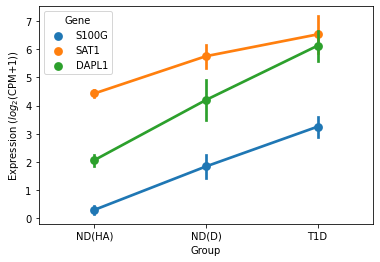

In [69]:
da = []
for sample in NOD_ND_ClustHealthyAdult:
    for gene in increasing_genes:
        da.append(['ND(HA)', gene, log2cpm_df.loc[gene][sample]])
for sample in NOD_ND_ClustDiabetic:
    for gene in increasing_genes:
        da.append(['ND(D)', gene, log2cpm_df.loc[gene][sample]])
for sample in NOD_T1D_ClustDiabetic:
    for gene in increasing_genes:
        da.append(['T1D', gene, log2cpm_df.loc[gene][sample]])
increasing_plot_df = pd.DataFrame(
    data=da,
    columns=['Group', 'Gene', r'Expression ($log_2$(CPM+1))']
)
sns.pointplot(data=increasing_plot_df, x='Group', y=r'Expression ($log_2$(CPM+1))', hue='Gene', ci='sd')
plt.savefig('./results/increasing_genes_NOD.pdf', format='pdf')
plt.show()   
      

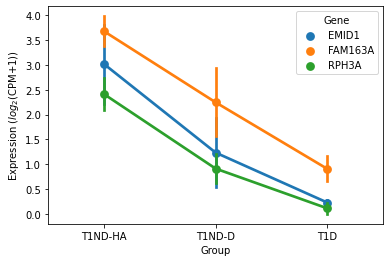

In [70]:
da = []
for sample in NOD_ND_ClustHealthyAdult:
    for gene in decreasing_genes:
        da.append(['ND(HA)', gene, log2cpm_df.loc[gene][sample]])
for sample in NOD_ND_ClustDiabetic:
    for gene in decreasing_genes:
        da.append(['ND(D)', gene, log2cpm_df.loc[gene][sample]])
for sample in NOD_T1D_ClustDiabetic:
    for gene in decreasing_genes:
        da.append(['T1D', gene, log2cpm_df.loc[gene][sample]])
decreasing_plot_df = pd.DataFrame(
    data=da,
    columns=['Group', 'Gene', r'Expression ($log_2$(CPM+1))']
)
sns.pointplot(data=decreasing_plot_df, x='Group', y=r'Expression ($log_2$(CPM+1))', hue='Gene', ci='sd')
plt.savefig('./results/decreasing_genes_NOD.pdf', format='pdf')
plt.show()   